-----------
Initializing structure...
time for choose_chunkdivision = 0.000744104 s
Working in 2D dimensions.
Computational cell is 14 x 14 x 0 with resolution 50
     block, center = (0,0,0)
          size (1e+20,0.5,1e+20)
          axes (0.948244,0.317542,0), (-0.317542,0.948244,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 1.44635 s
-----------
MPB solved for frequency_1(0.379298,0.127017,0) = 0.172001 after 16 iters
MPB solved for frequency_1(1.87915,0.629277,0) = 0.613241 after 10 iters
MPB solved for frequency_1(1.98779,0.665658,0) = 0.645187 after 8 iters
MPB solved for frequency_1(1.9877,0.665629,0) = 0.645161 after 3 iters
MPB solved for frequency_1(1.9877,0.665629,0) = 0.645161 after 1 iters


FloatProgress(value=0.0, description='0% done ', max=127.5)

Meep progress: 5.18/127.5 = 4.1% done in 4.0s, 94.5s to go
on time step 520 (time=5.2), 0.00769661 s/step
Meep progress: 10.75/127.5 = 8.4% done in 8.0s, 86.9s to go
on time step 1077 (time=10.77), 0.00719494 s/step
Meep progress: 16.46/127.5 = 12.9% done in 12.0s, 81.0s to go
on time step 1648 (time=16.48), 0.00701193 s/step
Meep progress: 22.32/127.5 = 17.5% done in 16.0s, 75.5s to go
on time step 2235 (time=22.35), 0.00682517 s/step
Meep progress: 28.39/127.5 = 22.3% done in 20.0s, 69.9s to go
on time step 2842 (time=28.42), 0.00659414 s/step
Meep progress: 34.62/127.5 = 27.2% done in 24.0s, 64.4s to go
on time step 3466 (time=34.66), 0.00641857 s/step
Meep progress: 40.89/127.5 = 32.1% done in 28.0s, 59.3s to go
on time step 4093 (time=40.93), 0.00638295 s/step
Meep progress: 47.0/127.5 = 36.9% done in 32.0s, 54.9s to go
on time step 4702 (time=47.02), 0.00657263 s/step
Meep progress: 52.49/127.5 = 41.2% done in 36.0s, 51.5s to go
on time step 5252 (time=52.52), 0.00728644 s/step
M

/Users/JohnMihal/anaconda3/envs/mp/lib/python3.11/site-packages/meep/visualization.py:271: UserWarning: The specified user volume is larger than the simulation domain and has been truncated.
  warnings.warn(


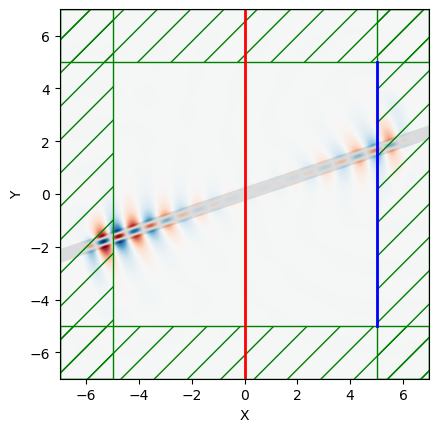

In [17]:
import meep as mp
import numpy as np
# import matplotlib
# matplotlib.use('agg')
import matplotlib.pyplot as plt

resolution = 50 # pixels/μm                                                                                                                                                                   

cell_size = mp.Vector3(14,14)

pml_layers = [mp.PML(thickness=2)]

# rotation angle (in degrees) of waveguide, counter clockwise (CCW) around z-axis                                                                                                             
rot_angle = np.radians(0)
rot_angle = 0.32313580228792316

w = .5 # width of waveguide                                                                                                                                                                  

geometry = [mp.Block(center=mp.Vector3(),
                     size=mp.Vector3(mp.inf,w,mp.inf),
                     e1=mp.Vector3(1).rotate(mp.Vector3(z=1), rot_angle),
                     e2=mp.Vector3(y=1).rotate(mp.Vector3(z=1), rot_angle),
                     material=mp.Medium(epsilon=12))]

wavelength = 1.55
fsrc = 1/wavelength # frequency of eigenmode or constant-amplitude source                                                                                                                             
kx = 0.4    # initial guess for wavevector in x-direction of eigenmode                                                                                                                        
bnum = 1    # band number of eigenmode                                                                                                                                                        

kpoint = mp.Vector3(kx).rotate(mp.Vector3(z=1), rot_angle)

compute_flux = True # compute flux (True) or plot the field profile (False)                                                                                                                   

sources = [mp.EigenModeSource(src=mp.GaussianSource(fsrc,fwidth=0.2*fsrc) if compute_flux else mp.ContinuousSource(fsrc),
                              center=mp.Vector3(0),
                              size=mp.Vector3(y=14),
                              direction=mp.NO_DIRECTION,
                              eig_kpoint=kpoint,
                              eig_band=bnum,
                              eig_match_freq=True)]

sim = mp.Simulation(cell_size=cell_size,
                    resolution=resolution,
                    boundary_layers=pml_layers,
                    sources=sources,
                    geometry=geometry)

if compute_flux:
    tran = sim.add_flux(fsrc, 0, 1, mp.FluxRegion(center=mp.Vector3(x=5), size=mp.Vector3(y=10), direction=mp.X_DIR))
    sim.run(until_after_sources=50)
    res = sim.get_eigenmode_coefficients(tran,
                                            [1],
                                            direction=mp.NO_DIRECTION,
                                            kpoint_func=lambda f,n: kpoint)
    print("flux:, {:.6f}, {:.6f}".format(mp.get_fluxes(tran)[0],abs(res.alpha[0,0,0])**2))
    print("rotation angle = {}°".format(int(np.ceil(np.degrees(rot_angle)))))
    sim.plot2D(output_plane=mp.Volume(center=mp.Vector3(), size=mp.Vector3(20,20)),
                fields=mp.Ez,
                field_parameters={'alpha':0.9})
    plt.show()

else:
    sim.run(until=100)
    sim.plot2D(output_plane=mp.Volume(center=mp.Vector3(), size=mp.Vector3(10,10)),
                fields=mp.Ez,
                field_parameters={'alpha':0.9})
    plt.title("rotation angle = {}°".format(int(np.ceil(np.degrees(rot_angle)))))

    plt.show()

# plt.savefig("oblique_rotangle{}.png".format(int(np.ceil(np.degrees(rot_angle)))))